# Scan aerosols for LSST Site

- Author :Sylvie Dagoret-Campagne

- creation : Friday 22 April 2016


In [4]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline

In [5]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5'

In [6]:
h5_files = [f for f in os.listdir(path) if f.endswith('.h5')]  
#print(h5_files)
full_h5file=h5_files
ix=0
nbfiles=0
for file in h5_files:
    fname = os.path.join(path, file)
    full_h5file[ix]=fname
    ix=ix+1 
    nbfiles=nbfiles+1
print 'number of files ',nbfiles

number of files  24


In [7]:
full_h5file[0]

'/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2013-01D.h5'

In [8]:
h5f = h5py.File(full_h5file[0], "r")  # file on which one works

In [9]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)

In [10]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)

In [11]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude

In [12]:
aod_shape=aod_mean.shape    # get the original size of the array
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

In [13]:
all_longitude=longitude[0,:]    # coordinates for X

In [14]:
all_latitude=latitude[0,:]      # coordinate for Y

In [15]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m

In [16]:
lsst_long_indexes=np.where(np.logical_and(all_longitude>=Longitude_lsst-2.5, all_longitude<=Longitude_lsst+2.5))
lsst_lat_indexes=np.where(np.logical_and(all_latitude>=Latitude_lsst-1, all_latitude<=Latitude_lsst+1))
lsst_lat_index=lsst_lat_indexes[0]
lsst_long_index=lsst_long_indexes[0]

In [17]:
print('lsst_long_indexes=',lsst_long_indexes)
print('lsst_lat_indexes=',lsst_lat_indexes)
print('lsst_aod = ',aod_mean_clean[lsst_lat_index,lsst_long_index])


('lsst_long_indexes=', (array([21]),))
('lsst_lat_indexes=', (array([27]),))
('lsst_aod = ', array([ 0.00629611], dtype=float32))


In [18]:
all_aod=np.zeros(nbfiles)  # container for all AOD at LSST
dust_aod=np.zeros(nbfiles)  # container for all AOD at LSST
polluteddust_aod=np.zeros(nbfiles)  # container for all AOD at LSST
smoke_aod=np.zeros(nbfiles)  # container for all AOD at LSST

In [25]:
for ifile in range(0,nbfiles):
    h5f = h5py.File(full_h5file[ifile], "r")  # file on which one works
    #  Mean aod all aerosols type
    aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_shape=aod_mean.shape    # get the original size of the array
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data
    all_aod[ifile]=aod_mean_clean[lsst_lat_index,lsst_long_index]
    # dust aerosols
    aod_dust=h5f['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    dust_arr=np.array(aod_dust)  # convert in a numpy array
    aod_dust_clean=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data
    dust_aod[ifile]=aod_dust_clean[lsst_lat_index,lsst_long_index]
    # dust polluted aerosols
    aod_polluteddust=h5f['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
    aod_polluteddust_clean=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
    polluteddust_aod[ifile]=aod_polluteddust_clean[lsst_lat_index,lsst_long_index]
    # smoke aerosols
    aod_smoke=h5f['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    smoke_arr=np.array(aod_smoke)  # convert in a numpy array
    aod_smoke_clean=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data
    smoke_aod[ifile]=aod_smoke_clean[lsst_lat_index,lsst_long_index]

In [54]:
#indexes to separate day and nights
day_indexes=range(0,24,2)
night_indexes=range(1,24,2)
#all aerosols
all_aod_day=all_aod[day_indexes]
all_aod_night=all_aod[night_indexes]
#dust
dust_aod_day=dust_aod[day_indexes]
dust_aod_night=dust_aod[night_indexes]
# polluted dust
polluteddust_aod_day=polluteddust_aod[day_indexes]
polluteddust_aod_night=polluteddust_aod[night_indexes]
# smoke
smoke_aod_day=smoke_aod[day_indexes]
smoke_aod_night=smoke_aod[night_indexes]

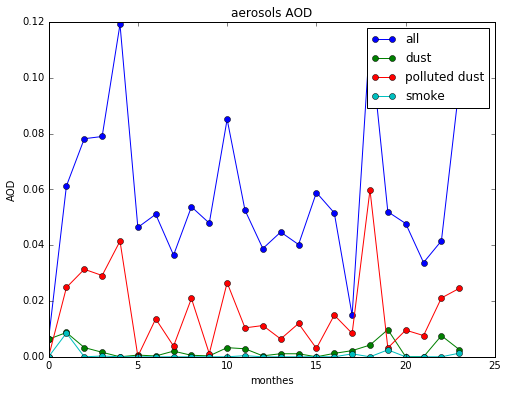

In [40]:
plt.figure(figsize=(8,6))
plt.plot(range(0,nbfiles),all_aod,'o-',label='all')
plt.plot(range(0,nbfiles),dust_aod,'o-',label='dust')
plt.plot(range(0,nbfiles),polluteddust_aod,'o-',label='polluted dust')
plt.plot(range(0,nbfiles),smoke_aod,'o-',label='smoke')
plt.xlabel('monthes')
plt.ylabel('AOD')
title='aerosols AOD'
plt.title(title)
plt.legend()
plt.show()

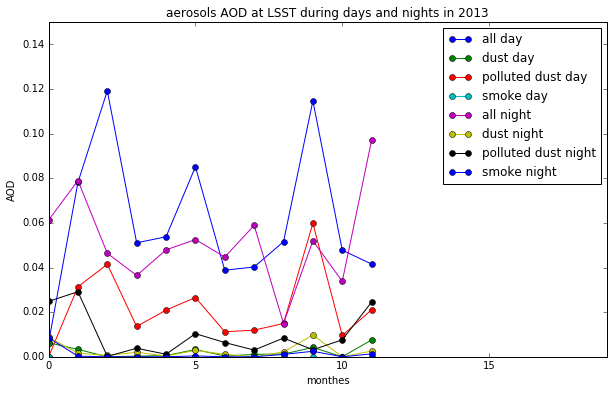

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(0,nbfiles/2),all_aod_day,'o-',label='all day')
plt.plot(range(0,nbfiles/2),dust_aod_day,'o-',label='dust day')
plt.plot(range(0,nbfiles/2),polluteddust_aod_day,'o-',label='polluted dust day')
plt.plot(range(0,nbfiles/2),smoke_aod_day,'o-',label='smoke day')

plt.plot(range(0,nbfiles/2),all_aod_night,'o-',label='all night')
plt.plot(range(0,nbfiles/2),dust_aod_night,'o-',label='dust night')
plt.plot(range(0,nbfiles/2),polluteddust_aod_night,'o-',label='polluted dust night')
plt.plot(range(0,nbfiles/2),smoke_aod_night,'o-',label='smoke night')

plt.xlabel('monthes')
plt.ylabel('AOD')
plt.ylim(0,0.15)
plt.xlim(0,19)
title='aerosols AOD at LSST during days and nights in 2013'
plt.title(title)
plt.legend()
plt.show()